In [1]:
# Importing the numpy library, which is used for working with arrays and mathematical functions
import numpy as np 

# Importing the pandas library, which is used for data manipulation and analysis. 
import pandas as pd 

# Setting a pandas option to display all columns of a DataFrame when it is displayed. 
# This is useful when you have a large number of columns in your DataFrame and you want to view all of them.
pd.set_option('display.max_columns', None)


In [2]:
# Using pandas' read_csv function to read the CSV file located at the specified path. 
df = pd.read_csv("/kaggle/input/amplify-analytics-data-science-task/train_small.csv")

# Checking the shape of the DataFrame. This returns a tuple representing the dimensionality of the DataFrame. 
# The first element of the tuple will give the number of rows and the second element will give the number of columns.
df.shape

(2168020, 54)

In [3]:
# Checking for null (missing) values in the DataFrame. 
# The isnull() function returns a DataFrame of True/False values, and sum() then counts the number of True values (i.e., nulls) in each column.
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2056136
user_hist_paid                    2055479
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3193
is_brand                                0
location_score1                         0
location_score2                    479316
log_historical_price                    1
listing_position                        1
price_usd                               1
has_promotion                           1
destination_id                          1
length_of_stay                          1
booking_window                          1
num_adults                              1
num_kids                                1
num_rooms                               1
stay_on_saturday                  

In [4]:
# Dropping rows with null values in the 'booked' column. 
# This is done because the target variable ('booked') should not have any missing values for the model to make accurate predictions.
df.dropna(subset=['booked'], inplace=True)

In [5]:
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2056135
user_hist_paid                    2055478
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3193
is_brand                                0
location_score1                         0
location_score2                    479316
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [6]:
# Checking for unique values in each column of the DataFrame. 
# This is useful to understand the diversity of values in each column.
df.nunique()

search_id                          87337
timestamp                          87129
site_id                               34
user_country_id                      191
user_hist_stars                      287
user_hist_paid                      4020
listing_country_id                   165
listing_id                        115583
listing_stars                          6
listing_review_score                  10
is_brand                               2
location_score1                      337
location_score2                     9045
log_historical_price                 379
listing_position                      40
price_usd                          61001
has_promotion                          2
destination_id                     12612
length_of_stay                        32
booking_window                       387
num_adults                             9
num_kids                              10
num_rooms                              8
stay_on_saturday                       2
log_click_propor

In [7]:
# Displaying information about the DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168019 entries, 0 to 2168018
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                float64
 15  price_usd                       float64
 16  has_promotion                   float64
 17  destination_id             

In [8]:
# Importing the ProfileReport function from the ydata_profiling library
from ydata_profiling import ProfileReport

# Creating a ProfileReport for the DataFrame
profile = ProfileReport(df, title="Pandas Profiling Report")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Displaying the ProfileReport in the notebook
profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Define a dictionary mapping column names to their new data types
new_data_types = {'search_id':'object',
'timestamp':'datetime64[ns]',
'site_id':'category',
'user_country_id':'category',
'user_hist_stars':'float64',
'user_hist_paid':'float64',
'listing_country_id':'category',
'listing_id':'category',
'listing_stars':'int8',
'listing_review_score':'float64',
'is_brand':'int8',
'location_score1':'float64',
'location_score2':'float64',
'log_historical_price':'float64',
'listing_position':'float64',
'price_usd':'float64',
'has_promotion':'int8',
'destination_id':'category',
'length_of_stay':'float64',
'booking_window':'float64',
'num_adults':'int8',
'num_kids':'int8',
'num_rooms':'int8',
'stay_on_saturday':'int8',
'log_click_proportion':'float64',
'distance_to_dest':'float64',
'random_sort':'int8',
'competitor1_rate':'category',
'competitor1_has_availability':'category',
'competitor1_price_percent_diff':'float64',
'competitor2_rate':'category',
'competitor2_has_availability':'category',
'competitor2_price_percent_diff':'float64',
'competitor3_rate':'category',
'competitor3_has_availability':'category',
'competitor3_price_percent_diff':'float64',
'competitor4_rate':'category',
'competitor4_has_availability':'category',
'competitor4_price_percent_diff':'float64',
'competitor5_rate':'category',
'competitor5_has_availability':'category',
'competitor5_price_percent_diff':'float64',
'competitor6_rate':'category',
'competitor6_has_availability':'category',
'competitor6_price_percent_diff':'float64',
'competitor7_rate':'category',
'competitor7_has_availability':'category',
'competitor7_price_percent_diff':'float64',
'competitor8_rate':'category',
'competitor8_has_availability':'category',
'competitor8_price_percent_diff':'float64',
'clicked':'int8',
'booking_value':'float64',
'booked':'int8'
}

# Change data types of columns based on the 'new_data_types' dictionary
df = df.astype(new_data_types)


In [11]:
# Displaying summary statistics of the DataFrame. 
# This includes count, mean, std, min, 25%, 50%, 75%, max for numerical columns. Values are rounded to 2 decimal places for readability.
df.describe().round(2)

,user_hist_stars,user_hist_paid,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_price_percent_diff,competitor2_price_percent_diff,competitor3_price_percent_diff,competitor4_price_percent_diff,competitor5_price_percent_diff,competitor6_price_percent_diff,competitor7_price_percent_diff,competitor8_price_percent_diff,clicked,booking_value,booked
count,111884.00,112541.00,2168019.00,2164826.00,2168019.00,2168019.00,1688703.00,2168019.00,2168019.00,2168019.00,2168019.00,2168019.00,2168019.00,2168019.00,2168019.00,2168019.00,2168019.0,139004.00,1465939.00,2168019.00,42509.00,240062.00,204892.00,56696.00,365414.00,43944.00,62107.00,266527.00,2168019.00,60512.00,2168019.00
mean,3.38,178.53,3.18,3.78,0.63,2.88,0.13,4.31,16.86,296.88,0.21,2.39,37.65,1.97,0.35,1.11,0.5,-24.41,1313.69,0.30,242.49,24.03,26.77,169.36,30.12,17.14,20.05,21.57,0.04,384.05,0.03
std,0.70,107.64,1.05,1.05,0.48,1.54,0.16,1.84,10.43,23873.54,0.41,2.06,52.13,0.86,0.73,0.42,0.5,16.18,2026.11,0.46,1145.40,2939.76,959.98,6143.79,1539.27,29.70,64.24,783.11,0.21,530.32,0.16
min,1.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.0,-326.57,0.01,0.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,0.00,0.00,0.00
25%,2.95,111.13,3.00,3.50,0.00,1.79,0.02,4.44,8.00,85.00,0.00,1.00,4.00,2.00,0.00,1.00,0.0,-31.28,142.52,0.00,7.00,7.00,7.00,7.00,7.00,6.00,7.00,7.00,0.00,124.00,0.00
50%,3.45,152.69,3.00,4.00,1.00,2.77,0.07,4.91,16.00,122.08,0.00,2.00,17.00,2.00,0.00,1.00,0.0,-20.46,392.11,0.00,10.00,11.00,11.00,11.00,12.00,11.00,12.00,11.00,0.00,218.84,0.00
75%,3.95,216.80,4.00,4.50,1.00,4.06,0.18,5.31,26.00,185.10,0.00,3.00,49.00,2.00,0.00,1.00,1.0,-13.53,1525.44,1.00,16.00,20.00,18.00,19.00,20.00,18.00,20.00,17.00,0.00,432.36,0.00
max,5.00,1445.24,5.00,5.00,1.00,6.98,1.00,6.21,40.00,19726328.00,1.00,57.00,498.00,9.00,9.00,8.00,1.0,-3.10,11637.79,1.00,13867.00,1439917.00,140907.00,1001584.00,607561.00,1363.00,7951.00,130000.00,1.00,20238.72,1.00


In [12]:
# Creating new columns 'day_of_week' and 'hour_of_day' from the 'timestamp' column. 
# 'day_of_week' will contain the day of the week (0 = Monday, 6 = Sunday), and 'hour_of_day' will contain the hour of the day (0-23).
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour_of_day'] = df['timestamp'].dt.hour

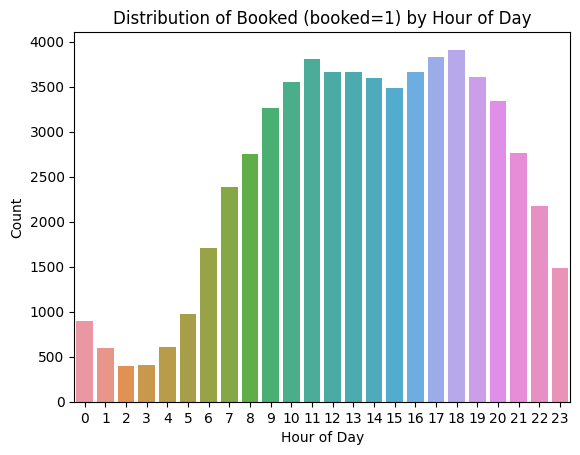

In [13]:
# Importing seaborn and matplotlib libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a new DataFrame 'booked_df' that only contains rows where 'booked' is equal to 1
booked_df = df[df['booked'] == 1]  # Filter DataFrame for 'booked' == 1

# Creating a count plot to visualize the distribution of 'booked' (where 'booked' is 1) by 'hour_of_day'
sns.countplot(data=booked_df, x='hour_of_day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Distribution of Booked (booked=1) by Hour of Day')
plt.show()


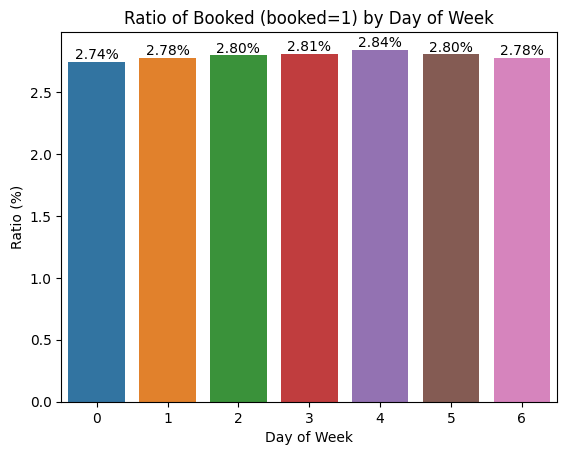

In [14]:
# Calculating the value counts for 'day_of_week' where 'booked' is equal to 1
booked_counts = df[df['booked'] == 1]['day_of_week'].value_counts()

# Calculating the value counts for 'day_of_week' in the entire DataFrame
total_counts = df['day_of_week'].value_counts()

# Calculating the ratio of bookings by day of the week
ratio = booked_counts / total_counts * 100


# Creating a bar plot to visualize the ratio of 'booked' (where 'booked' is 1) by 'day_of_week'
sns.barplot(x=ratio.index, y=ratio.values)
plt.xlabel('Day of Week')
plt.ylabel('Ratio (%)')
plt.title('Ratio of Booked (booked=1) by Day of Week')

# Adding data labels to the bar plot
for i, v in enumerate(ratio):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()


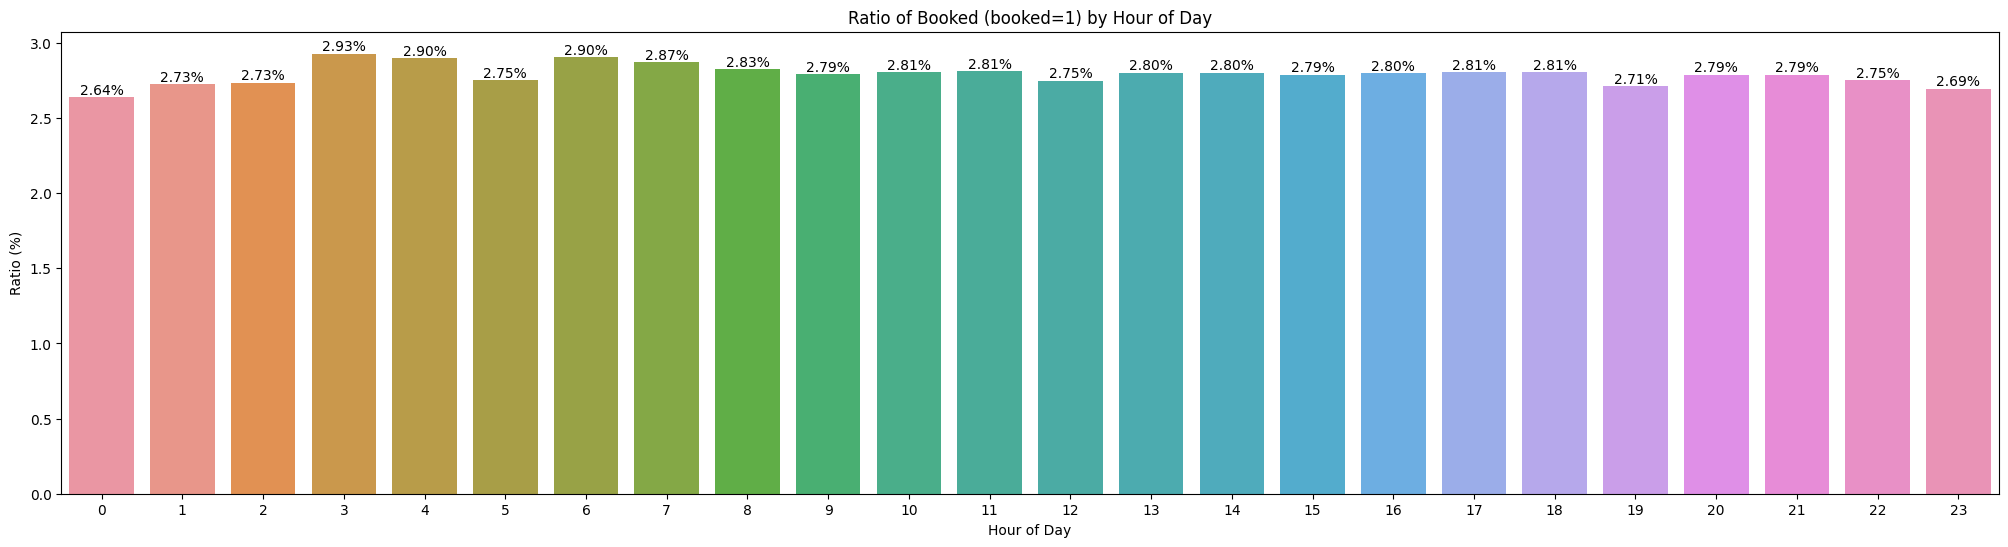

In [15]:
# Calculating the value counts for 'hour_of_day' where 'booked' is equal to 1
booked_counts = df[df['booked'] == 1]['hour_of_day'].value_counts()

# Calculating the value counts for 'hour_of_day' in the entire DataFrame
total_counts = df['hour_of_day'].value_counts()

# Calculating the ratio of bookings by hour of the day
ratio = booked_counts / total_counts * 100

# Setting the figure size for the plot
plt.figure(figsize=(25, 6))  # Set the figure size

# Creating a bar plot to visualize the ratio of 'booked' (where 'booked' is 1) by 'hour_of_day'
sns.barplot(x=ratio.index, y=ratio.values)
plt.xlabel('Hour of Day')
plt.ylabel('Ratio (%)')
plt.title('Ratio of Booked (booked=1) by Hour of Day')

# Adding data labels to the bar plot
for i, v in enumerate(ratio):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()


In [16]:
# Selecting the numeric columns from the DataFrame, excluding the 'booked' column
numeric_columns = df.select_dtypes(include=['int8', 'float64']).columns.drop('booked').tolist()

# Grouping the DataFrame by the 'booked' column and calculating the mean and median of the numeric columns
grouped_stats = df.groupby('booked')[numeric_columns].agg(['mean', 'median'])

# Printing the grouped statistics, rounded to 2 decimal places
grouped_stats.round(2)

user_hist_stars        user_hist_paid         listing_stars         \
                  mean median           mean  median          mean median   
booked                                                                      
0                 3.38   3.45         178.51  152.76          3.18    3.0   
1                 3.38   3.44         178.99  152.45          3.32    3.0   

       listing_review_score        is_brand        location_score1         \
                       mean median     mean median            mean median   
booked                                                                      
0                      3.77    4.0     0.63    1.0            2.88   2.77   
1                      3.94    4.0     0.66    1.0            2.84   2.71   

       location_score2        log_historical_price        listing_position  \
                  mean median                 mean median             mean   
booked                                                                       
0                 0.13   0.07                 4.31   4.91            17.13   
1                 0.19   0.13                 4.31   4.93             7.73   

              price_usd        has_promotion        length_of_stay         \
       median      mean median          mean median           mean median   
booked                                                                      
0        16.0    296.77  123.0          0.21    0.0            2.4    2.0   
1         4.0    300.88  113.0          0.30    0.0            2.1    2.0   

       booking_window        num_adults        num_kids        num_rooms  \
                 mean median       mean median     mean median      mean   
booked                                                                     
0               37.83   17.0       1.97    2.0     0.35    0.0      1.11   
1               31.55   13.0       1.94    2.0     0.37    0.0      1.13   

              stay_on_saturday        log_click_proportion         \
       median             mean median                 mean median   
booked                                                              
0         1.0             0.50    0.0               -24.49 -20.54   
1         1.0             0.51    1.0               -22.13 -17.99   

       distance_to_dest         random_sort         \
                   mean  median        mean median   
booked                                               
0               1314.92  392.97        0.30    0.0   
1               1270.80  360.60        0.06    0.0   

       competitor1_price_percent_diff        competitor2_price_percent_diff  \
                                 mean median                           mean   
booked                                                                        
0                              241.44   10.0                          24.18   
1                              280.79   10.0                          19.70   

              competitor3_price_percent_diff         \
       median                           mean median   
booked                                                
0        11.0                          27.03   11.0   
1        12.0                          19.16   12.0   

       competitor4_price_percent_diff        competitor5_price_percent_diff  \
                                 mean median                           mean   
booked                                                                        
0                              166.53   11.0                          30.45   
1                              266.97   11.0                          19.53   

              competitor6_price_percent_diff         \
       median                           mean median   
booked                                                
0        12.0                          17.16   11.0   
1        13.0                          16.80   11.0   

       competitor7_price_percent_diff        competitor8_price_percent_diff  \
                                 mean

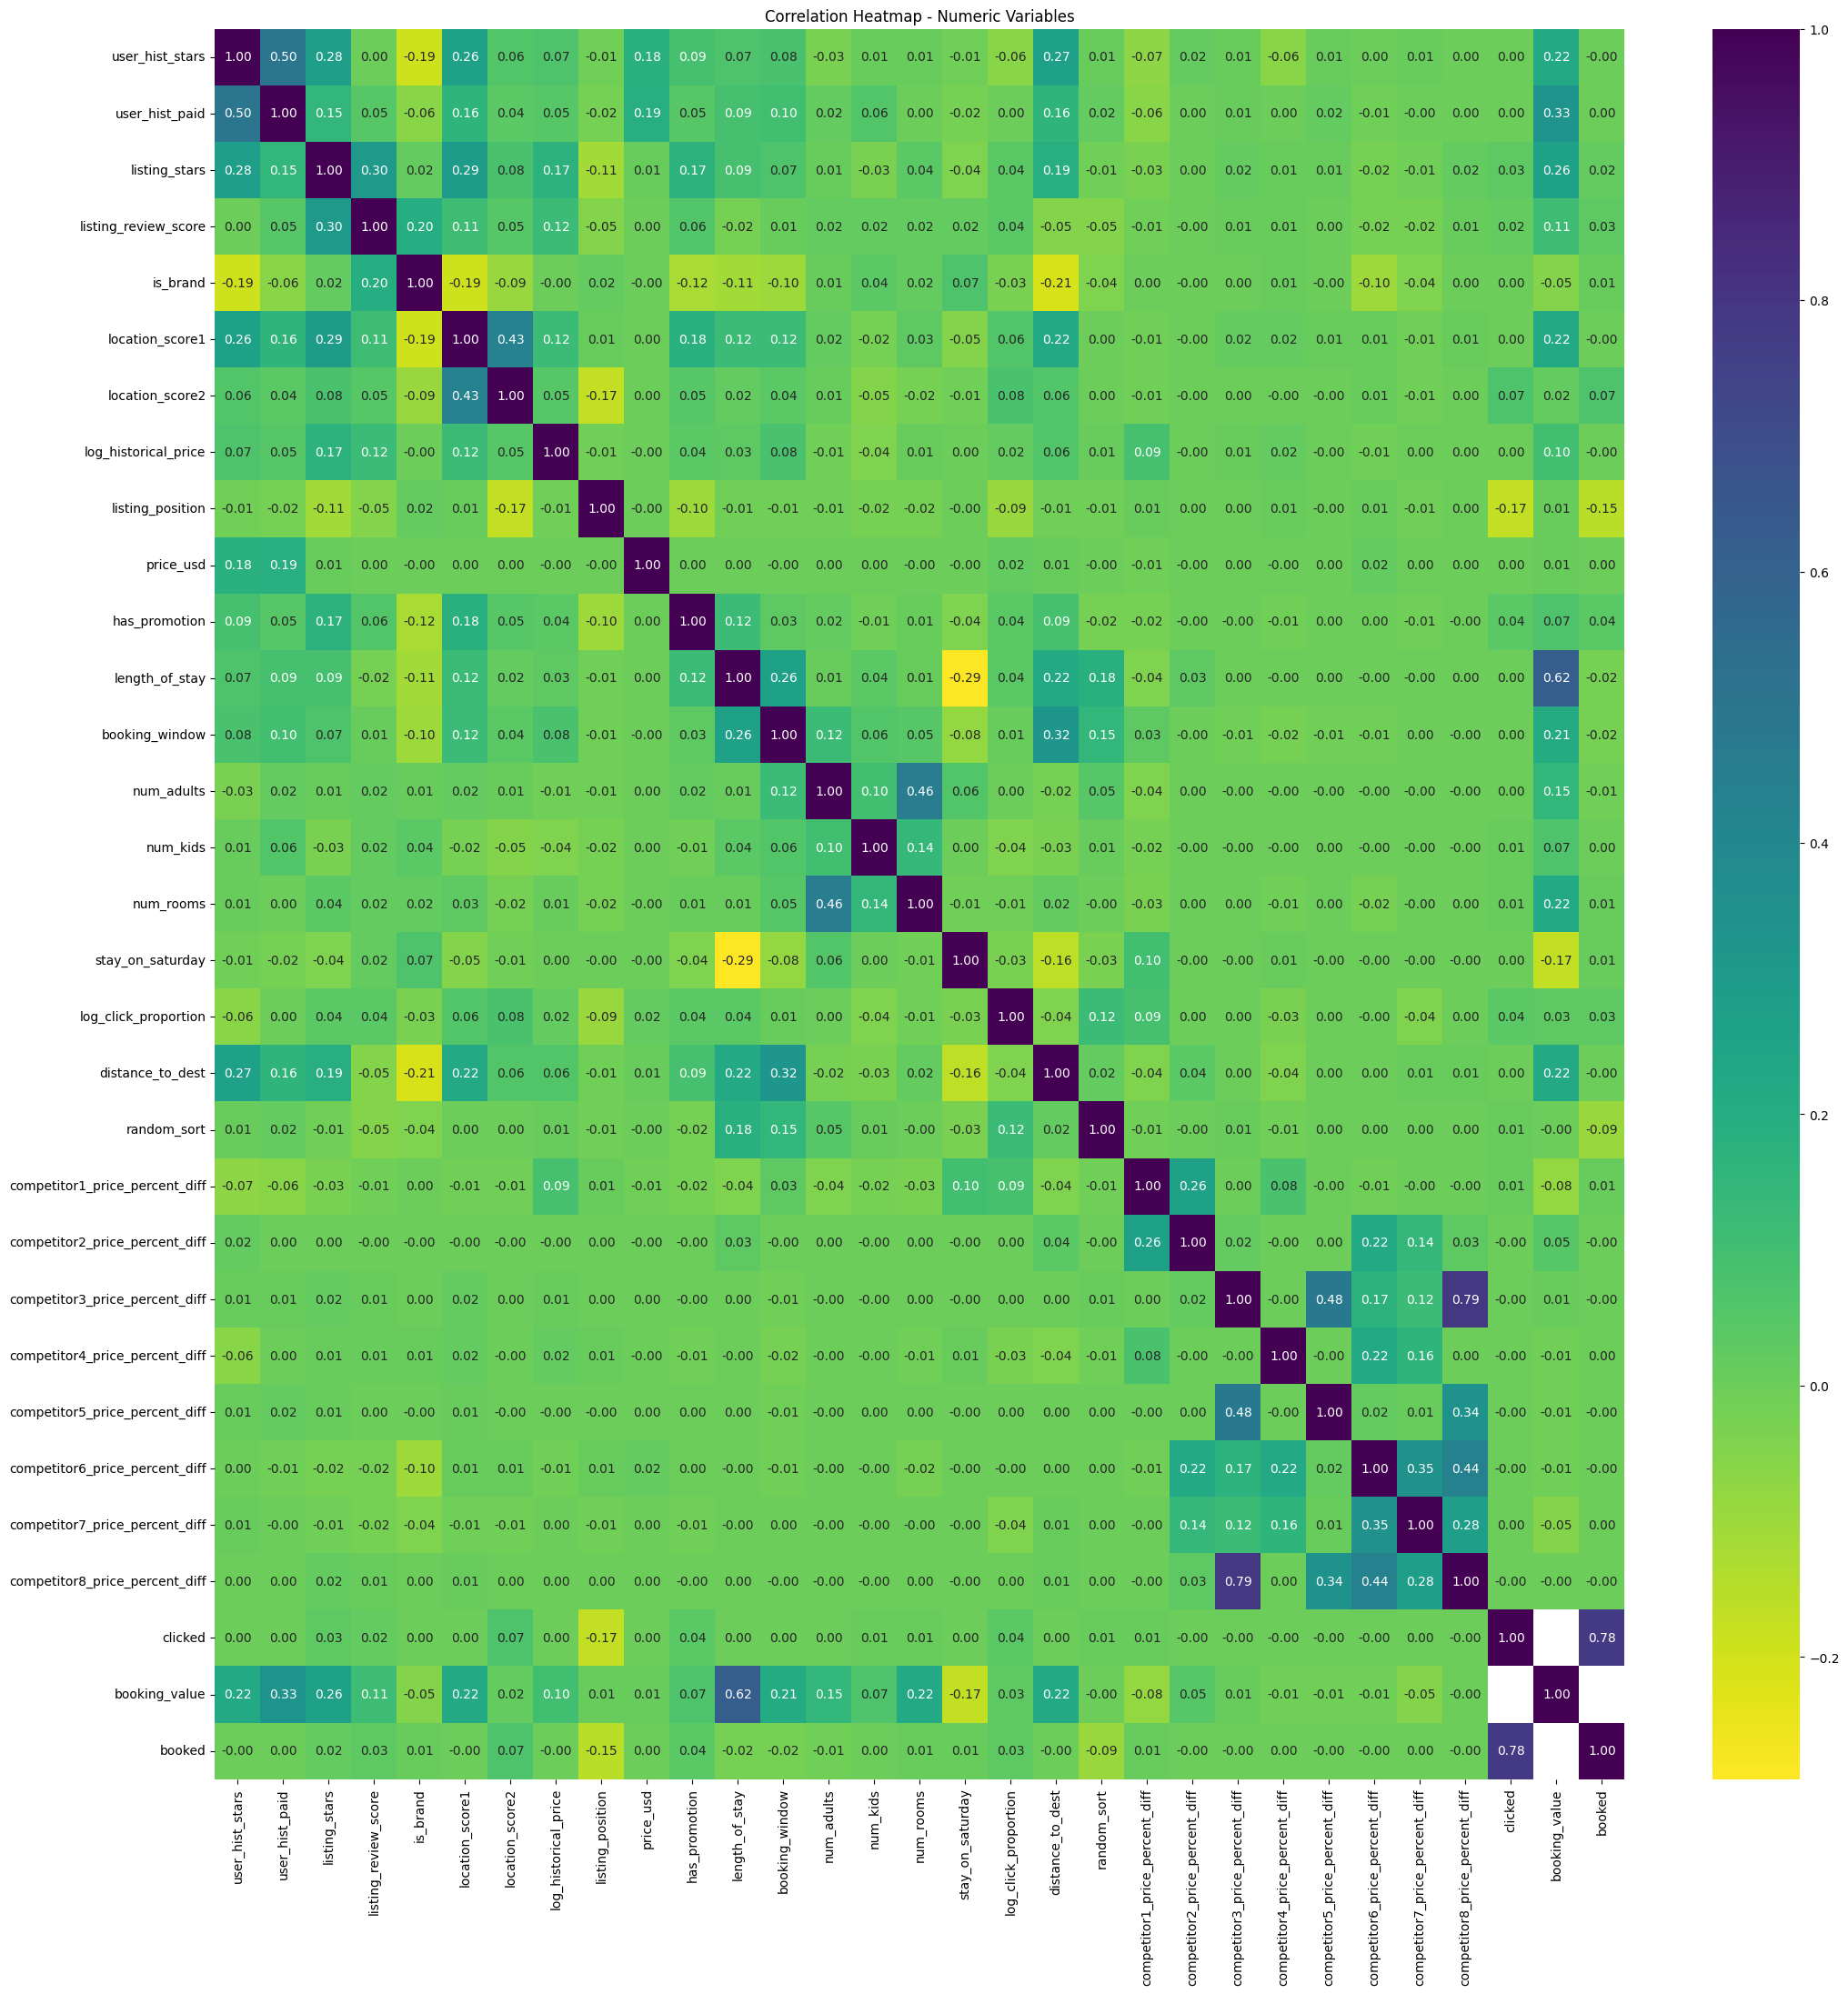

In [17]:
# Calculating the correlation matrix for the numeric columns
correlation_matrix = df.select_dtypes(include=['int8', 'float64']).corr().round(2)

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis_r')
plt.title('Correlation Heatmap - Numeric Variables')
plt.show()
